<a href="https://colab.research.google.com/github/TheJoys2019/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Artin%20Sinani%20DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [127]:
# Loaded the data as a pandas data frame
import pandas as pd
import numpy as np

columns = ['A1', 'A2', 'A3', "A4", 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']

df = pd.read_csv('https://raw.githubusercontent.com/TheJoys2019/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/master/crx.data', 
                 header=None, names=columns)

df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [128]:
# Validating that it has the appropriate # of rows/columns 

df.shape

(690, 16)

In [196]:
df['A2'].value_counts()

?        12
22.67     9
20.42     7
25.00     6
19.17     6
20.67     6
22.50     6
18.83     6
23.58     6
24.50     6
23.08     5
23.00     5
27.83     5
27.67     5
23.25     5
33.17     5
26.17     4
27.25     4
41.17     4
20.00     4
24.58     4
28.58     4
34.17     4
23.50     4
29.50     4
25.67     4
25.17     4
26.67     4
20.75     4
32.33     4
         ..
37.58     1
39.83     1
54.58     1
48.25     1
51.42     1
41.42     1
37.42     1
43.00     1
17.83     1
26.25     1
36.58     1
25.92     1
39.25     1
65.17     1
47.83     1
30.33     1
34.50     1
45.17     1
49.00     1
20.25     1
31.58     1
65.42     1
30.42     1
24.92     1
51.58     1
30.00     1
18.00     1
29.17     1
31.00     1
42.25     1
Name: A2, Length: 350, dtype: int64

In [198]:
df.replace('?',np.nan)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [199]:
# Checking to see if there are any NaN values in the data, Nothing to see here either
df.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [200]:
dfc.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [201]:
dfc['A1'].describe()

count     678
unique      2
top         b
freq      468
Name: A1, dtype: object

In [202]:
dfc['A5'].describe()

count     684
unique      3
top         g
freq      519
Name: A5, dtype: object

In [203]:
dfc['A6'].head()

0    w
1    q
2    q
3    w
4    w
Name: A6, dtype: object

In [204]:
dfc['A5'].value_counts()

g     519
p     163
gg      2
Name: A5, dtype: int64

In [205]:
dfc['A13'].head()

0    g
1    g
2    g
3    g
4    s
Name: A13, dtype: object

In [206]:
dfc['A14'].describe()

count     677.000000
mean      184.014771
std       173.806768
min         0.000000
25%        75.000000
50%       160.000000
75%       276.000000
max      2000.000000
Name: A14, dtype: float64

In [207]:
dfc['A14'].value_counts()

0.0       132
120.0      35
200.0      35
160.0      34
100.0      30
80.0       30
280.0      22
180.0      18
140.0      16
320.0      14
240.0      14
300.0      13
260.0      11
60.0        9
220.0       9
400.0       9
360.0       7
340.0       7
380.0       5
70.0        4
440.0       4
40.0        4
132.0       4
144.0       4
520.0       4
232.0       4
420.0       4
108.0       4
216.0       3
96.0        3
         ... 
17.0        1
174.0       1
62.0        1
45.0        1
356.0       1
2000.0      1
600.0       1
371.0       1
276.0       1
372.0       1
640.0       1
760.0       1
680.0       1
208.0       1
523.0       1
309.0       1
487.0       1
349.0       1
381.0       1
491.0       1
329.0       1
256.0       1
840.0       1
416.0       1
76.0        1
224.0       1
186.0       1
32.0        1
432.0       1
202.0       1
Name: A14, Length: 170, dtype: int64

In [208]:
# Checking to see if the types are as required. It appears not, some modifications
# will be made now. 
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null float64
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null float64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null float64
A15    690 non-null float64
A16    690 non-null object
dtypes: float64(6), object(10)
memory usage: 86.3+ KB


In [209]:
# Changed necessary (continuous) types to floats as instructed

dfc = dfc.astype({'A2': float, "A3": float, "A8": float, 'A11': float, 'A14': float, 'A15': float})

dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null float64
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null float64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null float64
A15    690 non-null float64
A16    690 non-null object
dtypes: float64(6), object(10)
memory usage: 86.3+ KB


In [0]:
# Interesting...useful stuff (continuous tables)
df_cont = dfc.describe()

In [211]:
df_cont.head()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

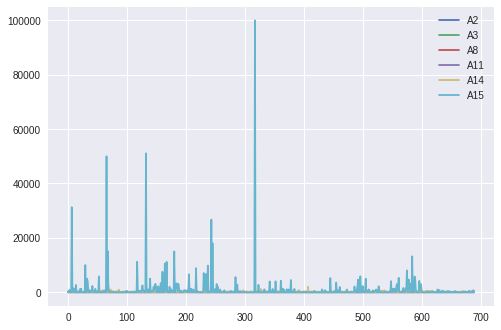

In [249]:
# Exploring the data via visual
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

dfc.plot()

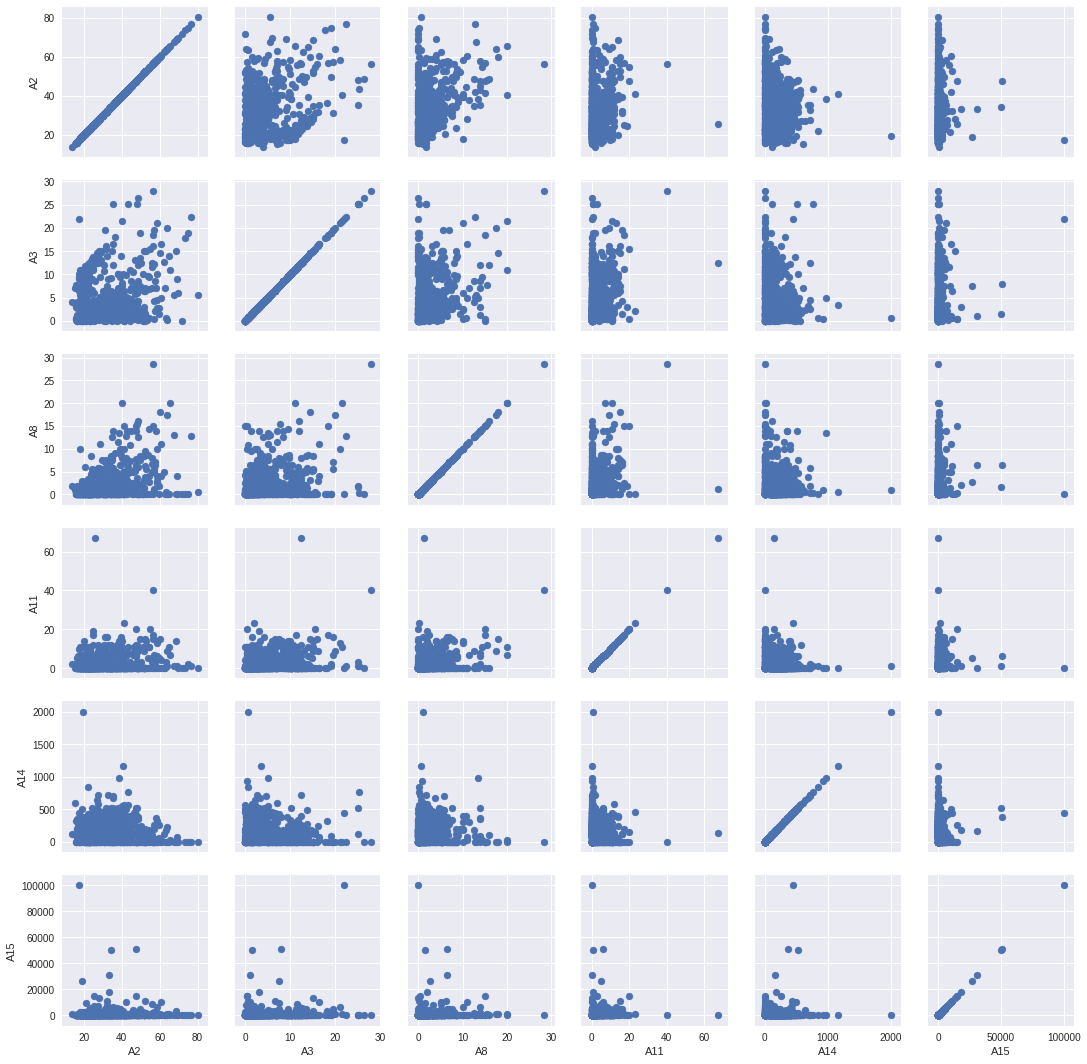

In [281]:
sns.PairGrid(dfc).map(plt.scatter);

In [0]:
# Creating Continuous DataFrame

df_cont = pd.DataFrame({'A16': dfc['A16'],'A2': dfc['A2'],'A3': dfc['A3'],'A8': dfc['A8'],'A11': dfc['A11'], 'A14': dfc['A14'],'A15': dfc['A15']})

In [0]:
df_cont = df_cont.set_index('A16').sort_index()

In [252]:
df_cont.tail()

,A11,A14,A15,A2,A3,A8
A16,,,,,,
-,0.0,20.0,16.0,23.58,11.500,3.000
-,0.0,400.0,0.0,39.42,1.710,0.165
-,0.0,220.0,1000.0,22.75,6.165,0.165
-,0.0,440.0,4500.0,34.42,1.335,0.125
-,0.0,0.0,0.0,35.00,3.375,8.290


In [253]:
dfc['A16'].value_counts()

-    383
+    307
Name: A16, dtype: int64

In [0]:
# Splitting them up into two separate dfs so we can compare
minus = df_cont.tail(383)
plus = df_cont.head(307)

In [255]:
minus.head()

,A11,A14,A15,A2,A3,A8
A16,,,,,,
-,0.0,100.0,20.0,19.42,1.500,2.00
-,0.0,0.0,340.0,80.25,5.500,0.54
-,0.0,130.0,1.0,40.92,0.835,0.00
-,0.0,163.0,0.0,34.25,1.750,0.25
-,0.0,680.0,0.0,35.25,3.165,3.75


In [256]:
plus.describe()

,A11,A14,A15,A2,A3,A8
count,307.000000,301.000000,307.000000,305.000000,307.000000,307.000000
mean,4.605863,164.421927,2038.859935,33.720492,5.904951,3.427899
std,6.320242,161.770675,7659.763941,12.809641,5.471485,4.120792
min,0.000000,0.000000,0.000000,13.750000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,23.170000,1.500000,0.750000
50%,3.000000,120.000000,221.000000,30.500000,4.460000,2.000000
75%,7.000000,280.000000,1209.000000,41.330000,9.520000,5.000000
max,67.000000,840.000000,100000.000000,76.750000,28.000000,28.500000


In [257]:
minus.describe()

,A11,A14,A15,A2,A3,A8
count,383.000000,376.000000,383.000000,373.000000,383.000000,383.000000
mean,0.631854,199.699468,198.605744,29.808231,3.839948,1.257924
std,1.900049,181.564835,671.608839,10.919291,4.337662,2.120481
min,0.000000,0.000000,0.000000,15.170000,0.000000,0.000000
25%,0.000000,100.000000,0.000000,22.000000,0.835000,0.125000
50%,0.000000,167.500000,1.000000,27.330000,2.210000,0.415000
75%,0.000000,272.000000,67.000000,34.830000,5.000000,1.500000
max,20.000000,2000.000000,5552.000000,80.250000,26.335000,13.875000


In [258]:
plus.fillna('0')

,A11,A14,A15,A2,A3,A8
A16,,,,,,
+,1.0,202,0.0,30.83,0.000,1.250
+,0.0,70,0.0,28.33,5.000,11.000
+,3.0,120,14.0,48.25,25.085,1.750
+,0.0,40,0.0,20.5,10.000,2.500
+,6.0,520,196.0,38.17,10.125,2.500
+,0.0,0,0.0,42.83,4.625,4.580
+,1.0,80,9800.0,21.33,7.500,1.415
+,0.0,0,0.0,26.17,0.250,0.000
+,5.0,220,2503.0,20.67,1.835,2.085


In [259]:
minus.fillna('0')

,A11,A14,A15,A2,A3,A8
A16,,,,,,
-,0.0,100,20.0,19.42,1.500,2.000
-,0.0,0,340.0,80.25,5.500,0.540
-,0.0,130,1.0,40.92,0.835,0.000
-,0.0,163,0.0,34.25,1.750,0.250
-,0.0,680,0.0,35.25,3.165,3.750
-,0.0,80,0.0,24.92,1.250,0.000
-,0.0,320,0.0,33.92,1.585,0.000
-,0.0,523,0.0,31.83,2.500,7.500
-,0.0,120,475.0,24.5,13.335,0.040


In [185]:
plus['A15'].mean()

2038.85993485342

In [278]:
minus['A15'].mean()

198.60574412532637

In [279]:
table.head().T.mean()

A16
+    1.279167
-    1.595833
dtype: float64

In [291]:
stats.ttest_ind(plus['A15'],minus['A15'], nan_policy='omit')

Ttest_indResult(statistic=4.680216020964487, pvalue=3.4520256956287804e-06)

In [292]:
print('plus mean:', plus['A15'].mean())
print('minus mean:', minus['A15'].mean())

plus mean: 2038.85993485342
minus mean: 198.60574412532637


In [293]:
stats.ttest_ind(plus['A14'],minus['A14'], nan_policy='omit')

Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)

In [294]:
print('plus mean:', plus['A14'].mean())
print('minus mean:', minus['A14'].mean())

plus mean: 164.421926910299
minus mean: 199.6994680851064


In [289]:
# Printing out not one, not two but ALL the t-tests for all columns
for col in ['A2','A3','A8','A11','A14','A15']:
  print('Col:',col)
  print(stats.ttest_ind(plus[col],minus[col], nan_policy='omit'))

Col: A2
Ttest_indResult(statistic=4.2922156166315455, pvalue=2.0276637071781407e-05)
Col: A3
Ttest_indResult(statistic=5.529983376148159, pvalue=4.5516807023080845e-08)
Col: A8
Ttest_indResult(statistic=8.935819983773701, pvalue=3.67105374016002e-18)
Col: A11
Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)
Col: A14
Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)
Col: A15
Ttest_indResult(statistic=4.680216020964487, pvalue=3.4520256956287804e-06)


In [0]:
# categ data

df_cat = df.copy()
cat_list = ['A1','A4','A5', 'A6','A7','A9','A10','A12','A13', 'A16']

for obj in cat_list:
  df_cat[obj] = pd.Categorical(df_cat[obj])
  df_cat[obj] = df_cat[obj].cat.codes

In [262]:
df_cat.describe()

# A14 and A15 have highest STD

,A1,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A15,A16
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,1.660870,4.758725,2.215942,1.466667,6.672464,5.994203,2.223406,0.523188,0.427536,2.40000,0.457971,0.176812,1017.385507,0.555072
std,0.509195,4.978163,0.477087,0.860126,4.320266,2.594506,3.346513,0.499824,0.495080,4.86294,0.498592,0.557869,5210.102598,0.497318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,2.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.750000,2.000000,1.000000,6.000000,8.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,5.000000,1.000000
75%,2.000000,7.207500,2.000000,1.000000,11.000000,8.000000,2.625000,1.000000,1.000000,3.00000,1.000000,0.000000,395.500000,1.000000
max,2.000000,28.000000,3.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2.000000,100000.000000,1.000000


In [0]:
# make -/+ into numerical
plus_d = df_cat[df_cat['A16']==0].copy()
minus_d = df_cat[df_cat['A16']==1].copy()

In [0]:
# let's pick two that are different
# A15 stands out with a giant mean, and A13's mean is relatively different compared

A15_d = df_cat['A15'].mean()

In [267]:
scipy.stats.ttest_1samp(plus_d['A15'],A15_d, nan_policy='omit')

Ttest_1sampResult(statistic=2.336583473592097, pvalue=0.020106005451071305)

In [0]:
A13_d = df_cat['A13'].mean()

In [269]:
scipy.stats.ttest_1samp(plus_d['A13'],A13_d, nan_policy='omit')


Ttest_1sampResult(statistic=-2.464478138442357, pvalue=0.014270578152385914)

In [0]:
# Make Chi2 and crosstabs

chi = df_cat[cat_list].copy()
for obj in chi.columns:
  chi[obj]=np.where(chi[obj]==-1,2,chi[obj])

In [0]:
chitab = pd.crosstab(chi['A16'],chi['A13'])

In [275]:
chitab

A13,0,1,2
A16,,,
0,287,5,15
1,338,3,42


In [280]:
# Creating a chi-square from the cross tab
scipy.stats.chi2_contingency(chitab)

(9.191570451545383,
 0.010094291370456362,
 2,
 array([[278.07971014,   3.55942029,  25.36086957],
        [346.92028986,   4.44057971,  31.63913043]]))

In [287]:
# One cross tab felt insignificant, so I am 
# printing all the cross tabs and chi2s for a better understanding
for col in ['A1','A4','A5','A6','A7','A9','A10','A12','A13']:
  current_cont = pd.crosstab(dfc['A16'],dfc[col])
  print(current_cont)
  chi_squared, p_value, dof, expected = stats.chi2_contingency(current_cont)
  
  print(f"Chi-Squared: {chi_squared}")
  print(f"P-value: {p_value}")
  print(f"Degrees of Freedom: {dof}") 
  print("Expected: \n", np.array(expected),'\n\n')

A1     a    b
A16          
+     98  206
-    112  262
Chi-Squared: 0.31128326491619945
P-value: 0.5768937883001117
Degrees of Freedom: 1
Expected: 
 [[ 94.15929204 209.84070796]
 [115.84070796 258.15929204]] 


A4   l    u    y
A16             
+    2  256   45
-    0  263  118
Chi-Squared: 26.234074966202144
P-value: 2.010680204180363e-06
Degrees of Freedom: 2
Expected: 
 [[  0.88596491 229.90789474  72.20614035]
 [  1.11403509 289.09210526  90.79385965]] 


A5     g  gg    p
A16              
+    256   2   45
-    263   0  118
Chi-Squared: 26.234074966202144
P-value: 2.010680204180363e-06
Degrees of Freedom: 2
Expected: 
 [[229.90789474   0.88596491  72.20614035]
 [289.09210526   1.11403509  90.79385965]] 


A6   aa   c  cc   d   e  ff   i  j   k   m   q  r   w   x
A16                                                      
+    19  62  29   7  14   7  14  3  14  16  51  2  33  32
-    35  75  12  23  11  46  45  7  37  22  27  1  31   6
Chi-Squared: 98.32520342679135
P-value: 3.499

In [300]:
ctable = pd.crosstab(dfc['A14'],dfc['A2'])
chi_squared, p_value, dof, expected = stats.chi2_contingency(ctable, correction=True)
print(f"P-value: {p_value}")

P-value: 0.00010636684921714866


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1) for the continuous data (6cols), based on the t-tests and P-Values run, I can determine that the A14 P-value is relatively small considering and based on the P-Value alone, the P-value is less than alpha = 0.05, thus we must reject the null hypothesis. If the P-Value is low, the null must go!

for the second t-test, A15, the P-value is extremely high, and because the P-value is high, we fail to reject the null hypothesis. 

2) Based on my findings for the Chi-2 tests,  as I compared A14 and A2 together, I found a very small P-Value, thus indicating that we must reject the null hypothesis. This indicates that the A14 and A2 have a strong relationship in terms of what the actual data represents. 

3) The most challenging part about this sprint was my ability to fight with the google colab, the layman term translation of the findings, if what I was interpreting was correct and worrying that it was Brian's birthday and I have to finish this early. :P 

*Your words here!*